Avocado Project

In [5]:
import requests
import zipfile
import io

url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Avocado/avocado.csv.zip'
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()
data = pd.read_csv('avocado.csv')

print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036

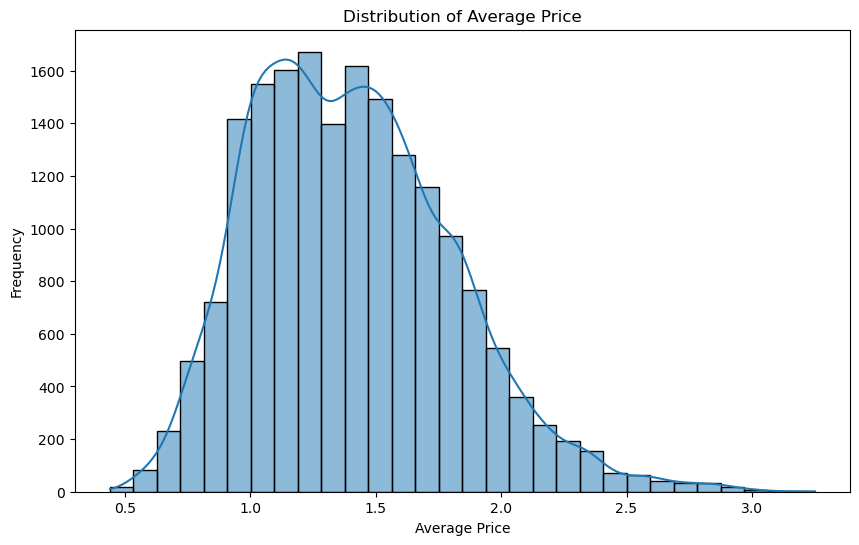

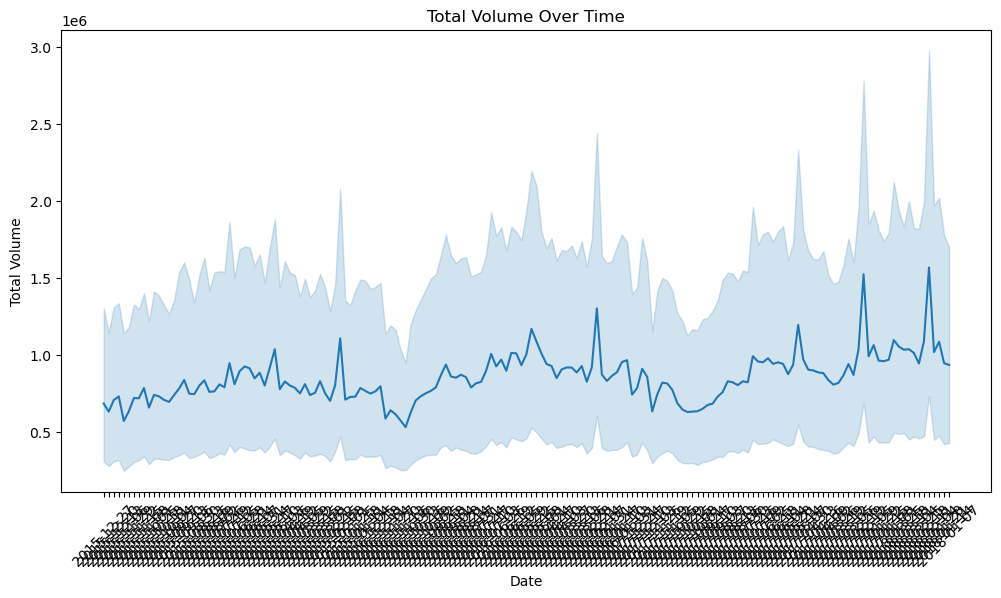

ValueError: Could not interpret value `Region` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import joblib
import requests
import zipfile
import io

url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Avocado/avocado.csv.zip'
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()

data = pd.read_csv('avocado.csv')

print(data.info())
print(data.head())
print(data.describe())
print(data.isnull().sum())
print(data.dtypes)

plt.figure(figsize=(10, 6))
sns.histplot(data['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Volume', data=data)
plt.title('Total Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.show()

# Average Price by Region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='AveragePrice', data=data)
plt.title('Average Price by Region')
plt.xticks(rotation=90)
plt.show()

# Average Price by Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='AveragePrice', data=data)
plt.title('Average Price by Type')
plt.show()

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data = data.drop(columns=['Date'])

label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['Region'] = label_encoder.fit_transform(data['Region'])

X_reg = data.drop(columns=['AveragePrice'])
y_reg = data['AveragePrice']

median_price = y_reg.median()
data['PriceAboveMedian'] = (data['AveragePrice'] > median_price).astype(int)
X_clf = data.drop(columns=['AveragePrice', 'PriceAboveMedian'])
y_clf = data['PriceAboveMedian']

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Regression Models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

for name, model in reg_models.items():
    model.fit(X_reg_train, y_reg_train)
    y_reg_pred = model.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, y_reg_pred)
    r2 = r2_score(y_reg_test, y_reg_pred)
    print(f'{name} - MSE: {mse}, R2: {r2}')

# Classification Models
clf_models = {
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC()
}

for name, model in clf_models.items():
    model.fit(X_clf_train, y_clf_train)
    y_clf_pred = model.predict(X_clf_test)
    print(f'{name} - Classification Report:\n{classification_report(y_clf_test, y_clf_pred)}')
    print(f'{name} - Confusion Matrix:\n{confusion_matrix(y_clf_test, y_clf_pred)}')

# Hyperparameter Tuning for Regression
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search_reg = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_reg_train, y_reg_train)
best_rf_reg = grid_search_reg.best_estimator_
print(f'Best Parameters for Regression: {grid_search_reg.best_params_}')

y_reg_pred_best = best_rf_reg.predict(X_reg_test)
mse_best = mean_squared_error(y_reg_test, y_reg_pred_best)
r2_best = r2_score(y_reg_test, y_reg_pred_best)
print(f'Best Random Forest Regressor - MSE: {mse_best}, R2: {r2_best}')

# Hyperparameter Tuning for Classification
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(X_clf_train, y_clf_train)
best_rf_clf = grid_search_clf.best_estimator_
print(f'Best Parameters for Classification: {grid_search_clf.best_params_}')

y_clf_pred_best = best_rf_clf.predict(X_clf_test)
print(f'Best Random Forest Classifier - Classification Report:\n{classification_report(y_clf_test, y_clf_pred_best)}')
print(f'Best Random Forest Classifier - Confusion Matrix:\n{confusion_matrix(y_clf_test, y_clf_pred_best)}')

# Save the best models
joblib.dump(best_rf_reg, 'best_regression_model.pkl')
joblib.dump(best_rf_clf, 'best_classification_model.pkl')
